# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

C:\Users\Akarsh Somani\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

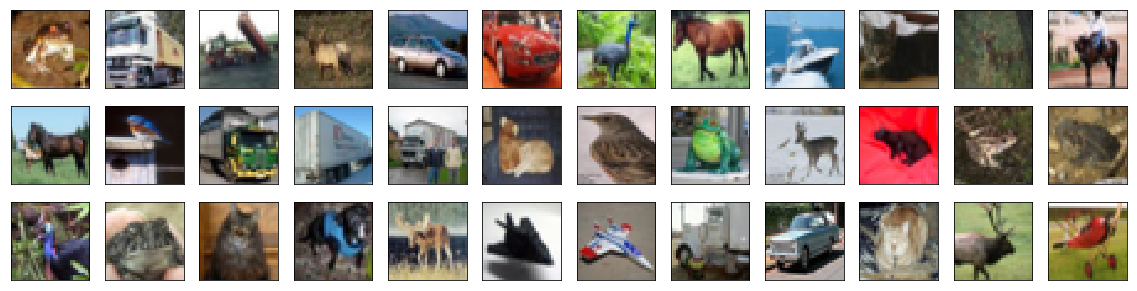

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
x_train.shape

(50000, 32, 32, 3)

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [6]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### Autoencoder

In [24]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(32, 32, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)



x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [25]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 8)           0         
__________

In [26]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 45000 samples, validate on 10000 samples
Epoch 1/50
45000/45000 [==============================] - 16s 358us/step - loss: 0.6468 - val_loss: 0.6179
Epoch 2/50
45000/45000 [==============================] - 16s 345us/step - loss: 0.6150 - val_loss: 0.6133
Epoch 3/50
45000/45000 [==============================] - 16s 345us/step - loss: 0.6078 - val_loss: 0.6033
Epoch 4/50
45000/45000 [==============================] - 15s 340us/step - loss: 0.6030 - val_loss: 0.6015
Epoch 5/50
45000/45000 [==============================] - 15s 344us/step - loss: 0.5996 - val_loss: 0.6011
Epoch 6/50
45000/45000 [==============================] - 16s 348us/step - loss: 0.5966 - val_loss: 0.5953
Epoch 7/50
45000/45000 [==============================] - 16s 347us/step - loss: 0.5943 - val_loss: 0.5953
Epoch 8/50
45000/45000 [==============================] - 16s 345us/step - loss: 0.5932 - val_loss: 0.5939
Epoch 9/50
45000/45000 [==============================] - 16s 351us/step - loss: 0.5923 - val_

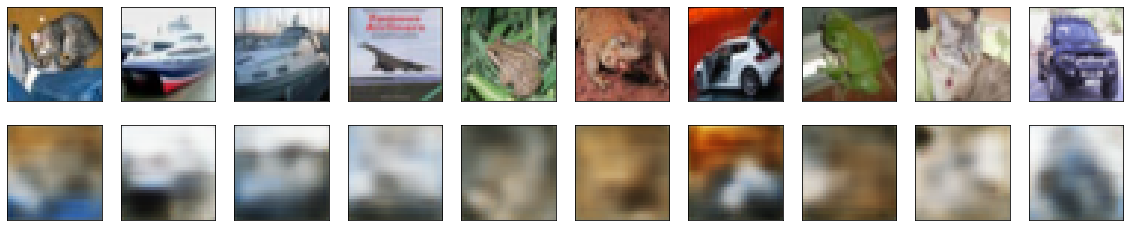

In [30]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i-1])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i-1])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [33]:
# evaluate and print test accuracy
autoencoder.evaluate(x_test, x_test, verbose=0)


0.5835008312225342

### thus autoencoders are not usefull here as it is used to remove noise which is not in our image thus it is blurring our image.